## <font color=Red>Importing the data<font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#metrics
from statistics import mean
from sklearn.metrics import accuracy_score 
from sklearn.metrics import explained_variance_score as evs
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import os

In [2]:
data=pd.read_csv('Toddler Autism dataset July 2018.csv')

## <font color=Blue>Getting a basic idea of the dataset<font>

In [3]:
data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [4]:
data['Ethnicity'].value_counts()

White European    334
asian             299
middle eastern    188
south asian        60
black              53
Hispanic           40
Others             35
Latino             26
Pacifica            8
mixed               8
Native Indian       3
Name: Ethnicity, dtype: int64

In [5]:
data['Who completed the test'].value_counts()

family member               1018
Health Care Professional      24
Health care professional       5
Self                           4
Others                         3
Name: Who completed the test, dtype: int64

## <font color=orange>One-hot encoding<font>

###  Since these are binary variables

In [6]:
data["Sex"]=data["Sex"].str.replace('m','0')
data["Sex"]=data["Sex"].str.replace('f','1')  
data['Jaundice']=data['Jaundice'].str.replace('yes','1')
data['Jaundice']=data['Jaundice'].str.replace('no','0')
data['Family_mem_with_ASD']=data['Family_mem_with_ASD'].str.replace('yes','1')
data['Family_mem_with_ASD']=data['Family_mem_with_ASD'].str.replace('no','0')
data['Class/ASD Traits ']=data['Class/ASD Traits '].str.replace('No','0')
data['Class/ASD Traits ']=data['Class/ASD Traits '].str.replace('Yes','1')

## <font color=orange>Label Encoding<font>

In [7]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['Ethnicity']= label_encoder.fit_transform(data['Ethnicity']) 
data['Who completed the test']= label_encoder.fit_transform(data['Who completed the test']) 

In [8]:
data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,1,8,1,0,4,0
1,2,1,1,0,0,0,1,1,0,0,0,36,4,0,5,1,0,4,1
2,3,1,0,0,0,0,0,1,1,0,1,36,4,0,8,1,0,4,1
3,4,1,1,1,1,1,1,1,1,1,1,24,10,0,0,0,0,4,1
4,5,1,1,0,1,1,1,1,1,1,1,20,9,1,5,0,1,4,1


## <font color=blue>Model Building<font>

In [9]:
from sklearn.linear_model import LogisticRegression
X = data.drop(['Class/ASD Traits '], axis=1)
y = data['Class/ASD Traits ']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

C:\Users\HOME\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## <font color=magenta>Evaluation metrics<font>

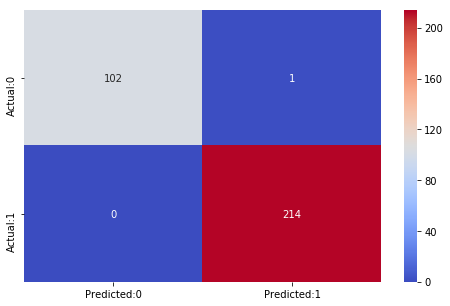

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
cm = confusion_matrix(y_test, y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="coolwarm")

In [14]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print('The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',((TP+TN)/float(TP+TN+FP+FN))*100,' %\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)



The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  99.6845425867508  %

 The Miss-classification = 1-Accuracy =  0.003154574132492094 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  1.0 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.9902912621359223 

 Positive Predictive value = TP / (TP+FP) =  0.9953488372093023 

 Negative predictive Value = TN / (TN+FN) =  1.0 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  103.00000000000004 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.0


In [20]:
roc_auc_score(y_test, y_pred)

TypeError: unsupported operand type(s) for -: 'str' and 'str'